In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load the data
file_path = "D:/Project/Data.csv"
df = pd.read_csv(file_path)


In [3]:
# Step 3: Initial data inspection
print("First 5 rows:")
print(df.head())
print("\nData shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


First 5 rows:
            Timestamp             Name Age                   Email ID  Gender  \
0  4-25-2025 12:35:05      Deeksha mg   22       deekshamg7@gmail.com  Female   
1  4-25-2025 12:53:19    Leroy Dsouza   22   lesterdsouza63@gmail.com    Male   
2  4-25-2025 12:56:09  Jenvisha Dcosta  22   dcostajenvisha@gmail.com  Female   
3  4-25-2025 12:57:43        Sindhu K   22   sindhu.kodi123@gmail.com  Female   
4  4-25-2025 12:57:58   Nishmitha M C   22  nishmithamc2000@gmail.com  Female   

  Occupation How many social media platforms do you use regularly?  \
0    Student                                                  1      
1    Student                                                 4+      
2    Student                                                 4+      
3    Student                                                 4+      
4    Student                                                 4+      

  Which social media platform do you use the most?  \
0                       


Basic statistics for numerical columns:
             age  hours_spent_numeric    cluster
count  76.000000            76.000000  76.000000
mean   26.578947             2.703947   0.907895
std    10.106451             1.503723   0.751490
min    18.000000             0.500000   0.000000
25%    21.000000             1.500000   0.000000
50%    22.000000             3.500000   1.000000
75%    26.000000             3.500000   1.000000
max    63.000000             6.000000   2.000000


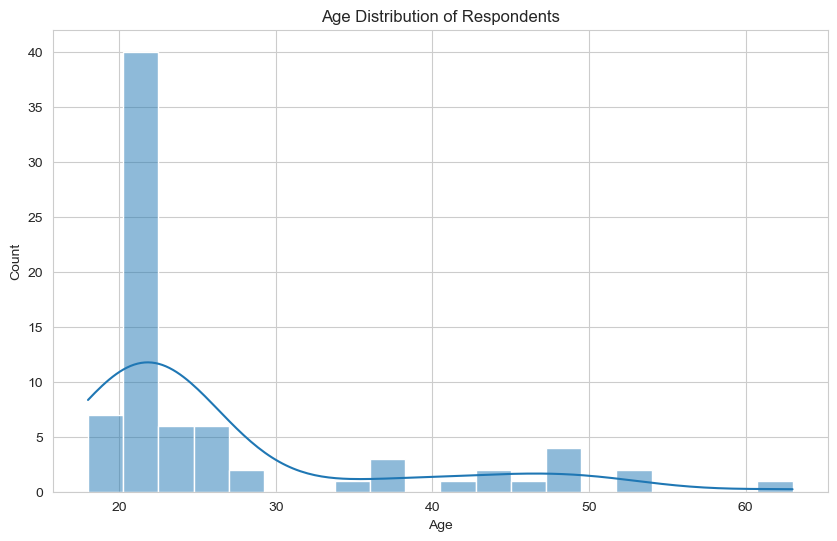

In [55]:
# Step 5: Basic Statistics
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Step 6: Univariate Analysis

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
# Step 4: Data Cleaning
# Clean column names (remove spaces and special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '').str.replace('/', '_')

# Clean age column (remove 'years' text)
df['age'] = df['age'].str.replace(' years', '').str.replace('years', '').str.strip().astype(float)

# Clean text columns
text_cols = ['name', 'email_id', 'occupation', 'how_many_social_media_platforms_do_you_use_regularly', 
             'which_social_media_platform_do_you_use_the_most', 'what_are_your_primary_reasons_of_use',
             'in_one_word_describe_how_social_media_has_affected_your_lifeex_good_bad_positively_negatively']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].str.strip()

# Step 5: Basic Statistics
print("\nBasic statistics for numerical columns:")
print(df.describe())


Basic statistics for numerical columns:
             age
count  76.000000
mean   26.578947
std    10.106451
min    18.000000
25%    21.000000
50%    22.000000
75%    26.000000
max    63.000000


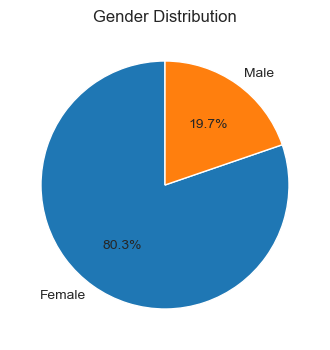

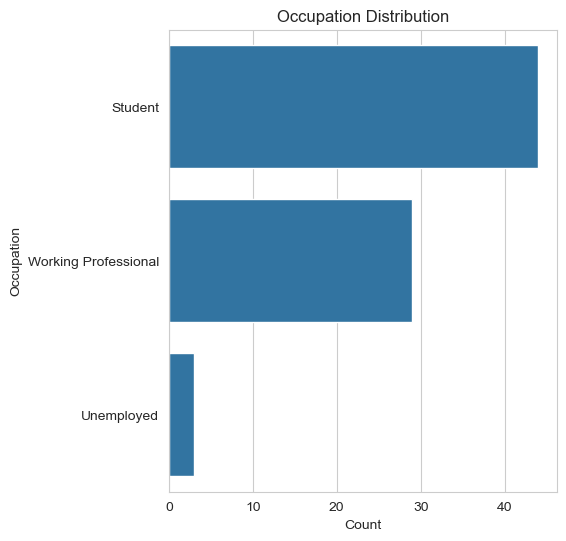

In [49]:
# Gender distribution
plt.figure(figsize=(4, 5))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Occupation distribution
plt.figure(figsize=(5, 6))
sns.countplot(data=df, y='occupation', order=df['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


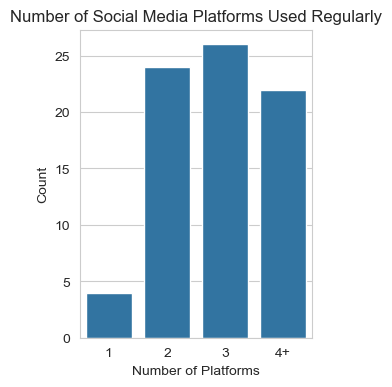

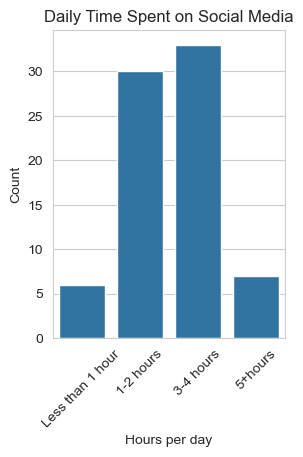

In [47]:
# Number of social media platforms used
plt.figure(figsize=(3, 4))
sns.countplot(data=df, x='how_many_social_media_platforms_do_you_use_regularly', 
              order=sorted(df['how_many_social_media_platforms_do_you_use_regularly'].unique(), key=lambda x: str(x)))
plt.title('Number of Social Media Platforms Used Regularly')
plt.xlabel('Number of Platforms')
plt.ylabel('Count')
plt.show()

# Time spent on social media
plt.figure(figsize=(3, 4))
time_order = ['Less than 1 hour', '1-2 hours', '3-4 hours', '5+hours']
sns.countplot(data=df, x='on_average_how_many_hours_per_day_do_you_sped_on_social_media', order=time_order)
plt.title('Daily Time Spent on Social Media')
plt.xlabel('Hours per day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

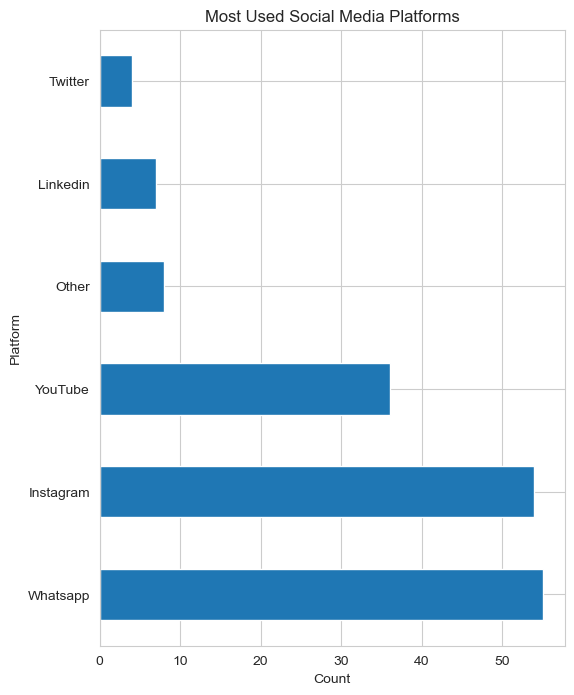

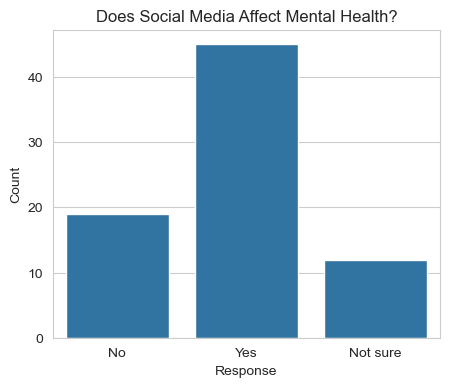

In [41]:
# Most used platform
plt.figure(figsize=(6, 8))
# Extract all platforms from the responses
platforms = []
for response in df['which_social_media_platform_do_you_use_the_most'].dropna():
    # Split by comma and strip whitespace
    items = [item.strip() for item in str(response).split(',')]
    platforms.extend(items)

platform_counts = pd.Series(platforms).value_counts()
platform_counts.plot(kind='barh')
plt.title('Most Used Social Media Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

# Mental health impact
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='do_you_feel_social_media_affects_your_mental_health')
plt.title('Does Social Media Affect Mental Health?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

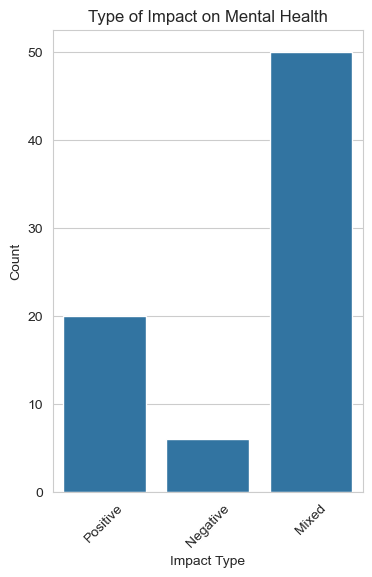

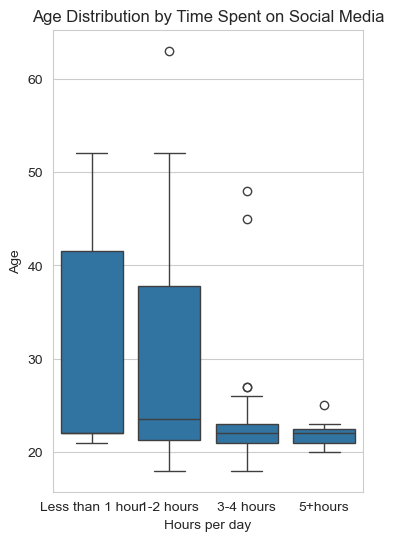

In [15]:
# Impact type (positive/negative/mixed)
plt.figure(figsize=(4, 6))
sns.countplot(data=df, x='if_yes_is_the_impact_positive_or_negative')
plt.title('Type of Impact on Mental Health')
plt.xlabel('Impact Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 7: Bivariate Analysis

# Age vs Time spent on social media
plt.figure(figsize=(4, 6))
sns.boxplot(data=df, x='on_average_how_many_hours_per_day_do_you_sped_on_social_media', y='age', order=time_order)
plt.title('Age Distribution by Time Spent on Social Media')
plt.xlabel('Hours per day')
plt.ylabel('Age')
plt.show()

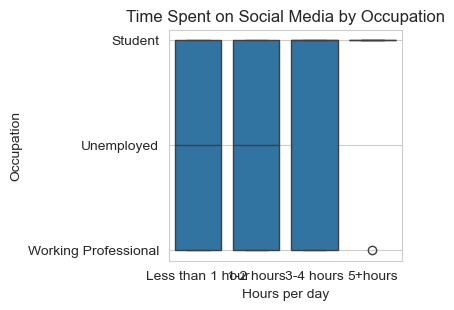

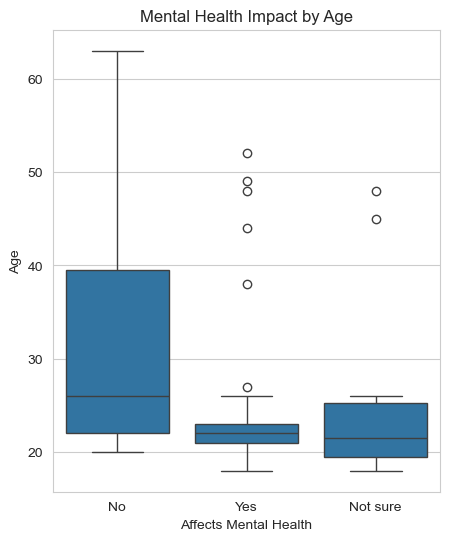

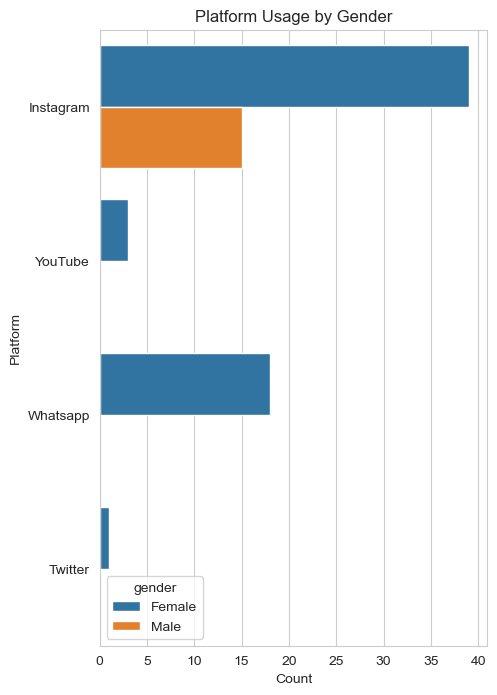

In [35]:
# Occupation vs Time spent
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y='occupation', x='on_average_how_many_hours_per_day_do_you_sped_on_social_media', order=time_order)
plt.title('Time Spent on Social Media by Occupation')
plt.xlabel('Hours per day')
plt.ylabel('Occupation')
plt.show()

# Mental health impact by age
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, x='do_you_feel_social_media_affects_your_mental_health', y='age')
plt.title('Mental Health Impact by Age')
plt.xlabel('Affects Mental Health')
plt.ylabel('Age')
plt.show()

# Platform usage by gender
platform_gender = df.explode('which_social_media_platform_do_you_use_the_most')
platform_gender['platform'] = platform_gender['which_social_media_platform_do_you_use_the_most'].str.split(',').str[0]
plt.figure(figsize=(5, 8))
sns.countplot(data=platform_gender, y='platform', hue='gender')
plt.title('Platform Usage by Gender')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

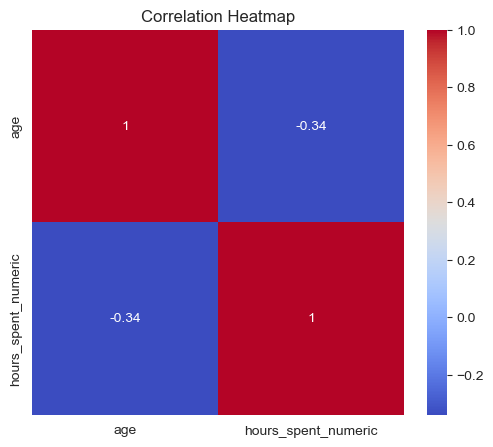

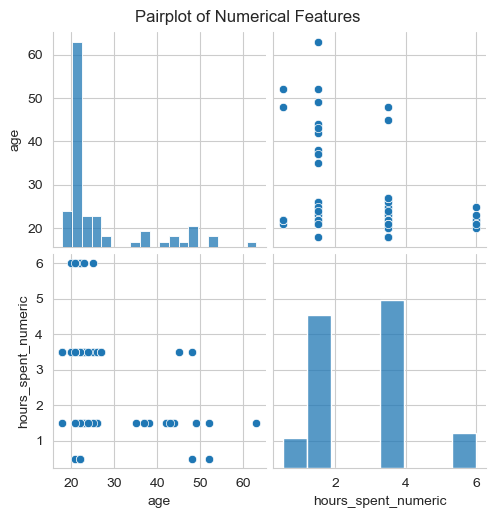

In [31]:
# Step 8: Multivariate Analysis

# Heatmap of correlations (for numerical columns)
# First, let's create some numerical features
df['hours_spent_numeric'] = df['on_average_how_many_hours_per_day_do_you_sped_on_social_media'].map({
    'Less than 1 hour': 0.5,
    '1-2 hours': 1.5,
    '3-4 hours': 3.5,
    '5+hours': 6
})

plt.figure(figsize=(6, 5))
sns.heatmap(df[['age', 'hours_spent_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of numerical features
sns.pairplot(df[['age', 'hours_spent_numeric']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [21]:
# Step 10: Advanced Analysis
import pandas as pd
# Cluster analysis of usage patterns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
cluster_df = pd.get_dummies(df[[
    'how_many_social_media_platforms_do_you_use_regularly',
    'on_average_how_many_hours_per_day_do_you_sped_on_social_media',
    'do_you_feel_social_media_affects_your_mental_health',
    'if_yes_is_the_impact_positive_or_negative']].fillna('Unknown'))


Chunk 0 shape:(76, 25)


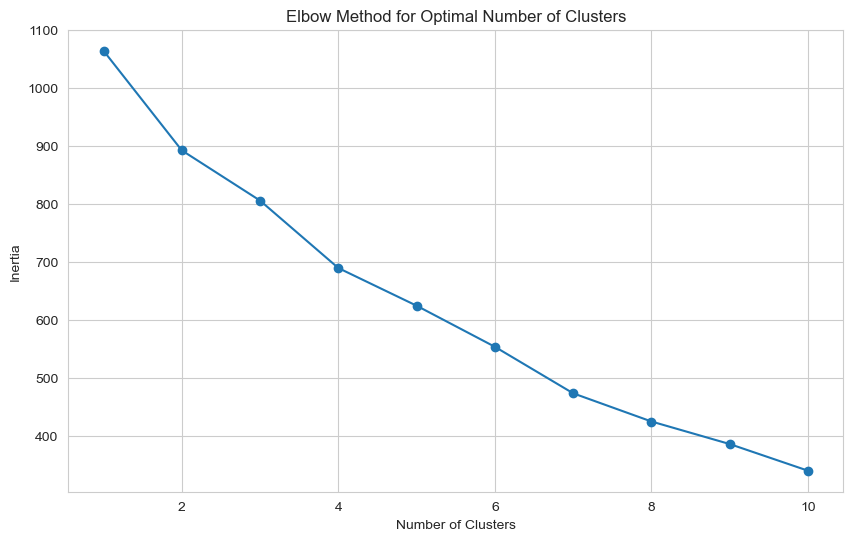

In [25]:
import warnings
warnings.filterwarnings("ignore",message="KMeans is known to have a memory leak")
chunksize=100000
#Load in chunks of 100000 rows
chunks=pd.read_csv(file_path,chunksize=chunksize)
#Process chunk by chunk
for i,chunk in enumerate(chunks):
    print(f"Chunk {i} shape:{chunk.shape}")

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [27]:
# Perform K-means clustering (assuming 3 clusters based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster characteristics
cluster_analysis = df.groupby('cluster').agg({
    'age': 'mean',
    'how_many_social_media_platforms_do_you_use_regularly': lambda x: x.mode()[0],
    'on_average_how_many_hours_per_day_do_you_sped_on_social_media': lambda x: x.mode()[0],
    'do_you_feel_social_media_affects_your_mental_health': lambda x: x.mode()[0],
    'if_yes_is_the_impact_positive_or_negative': lambda x: x.mode()[0]
})

print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
               age how_many_social_media_platforms_do_you_use_regularly  \
cluster                                                                   
0        24.040000                                                 4+     
1        25.242424                                                  3     
2        32.555556                                                  3     

        on_average_how_many_hours_per_day_do_you_sped_on_social_media  \
cluster                                                                 
0                                                3-4 hours              
1                                                1-2 hours              
2                                                1-2 hours              

        do_you_feel_social_media_affects_your_mental_health  \
cluster                                                       
0                                                      Yes    
1                                          